In [266]:
# How long will I be on hold?
#   - Which age group checks out the most books? Which age groups has the highest renewal rate (# ttl renewals/# ttl checkouts)
#   - Which library branch gets the most checkouts?
#   - Can the library branch and the average number of checkouts be used to estimate the age group of the patron?

# SF Library Data Analysis 

This analysis sets out to make observations about the San Francisco Library usage and its patrons,
in the ultimate quest to find the answer to the following question:
Who has my book? and does this give me any hints as to whether the book I want is going to be renewed?

In [267]:
#load libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

## Load Data  and Take a Look

In [268]:
# import DataSF dataset
df = pd.read_csv('Library_Usage.csv');
df.head()

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
0,3,SENIOR,28,13,65 to 74 years,X,Main Library,November,2012,z,email,True,2003,True,NaN
1,0,ADULT,21,10,55 to 59 years,X,Main Library,October,2015,z,email,True,2003,False,NaN
2,0,ADULT,275,559,60 to 64 years,X,Main Library,January,2015,z,email,True,2003,True,NaN
3,0,ADULT,73,38,45 to 54 years,M8,Mission Bay,February,2016,z,email,True,2003,False,NaN
4,0,ADULT,182,90,45 to 54 years,X,Main Library,July,2016,z,email,True,2003,False,NaN


In [269]:
#423448 records to start
df.shape

(423448, 15)

In [270]:
# What are the types of data we have to work with?
df.dtypes

Patron Type Code                  int64
Patron Type Definition           object
Total Checkouts                   int64
Total Renewals                    int64
Age Range                        object
Home Library Code                object
Home Library Definition          object
Circulation Active Month         object
Circulation Active Year          object
Notice Preference Code           object
Notice Preference Definition     object
Provided Email Address             bool
Year Patron Registered            int64
Outside of County                  bool
Supervisor District             float64
dtype: object

In [271]:
# Summary of numerical types
df.describe()

,Patron Type Code,Total Checkouts,Total Renewals,Year Patron Registered,Supervisor District
count,423448.000000,423448.000000,423448.000000,423448.000000,313138.000000
mean,1.036765,161.982097,59.657327,2010.348917,6.288240
std,4.188198,453.703678,225.009917,4.357374,3.123634
min,0.000000,0.000000,0.000000,2003.000000,1.000000
25%,0.000000,2.000000,0.000000,2007.000000,4.000000
50%,0.000000,19.000000,2.000000,2012.000000,6.000000
75%,1.000000,113.000000,27.000000,2014.000000,9.000000
max,104.000000,35907.000000,8965.000000,2016.000000,11.000000


In [272]:
# Is there any missing data?
df.isnull().sum()

Patron Type Code                     0
Patron Type Definition               0
Total Checkouts                      0
Total Renewals                       0
Age Range                          215
Home Library Code                   40
Home Library Definition              0
Circulation Active Month             0
Circulation Active Year              0
Notice Preference Code               0
Notice Preference Definition         0
Provided Email Address               0
Year Patron Registered               0
Outside of County                    0
Supervisor District             110310
dtype: int64

## Assessment

When taking a brief look at the data, I noticed the following:

    1. Header names include spaces
    2. Some columns are codified versions of another column, making the information duplicative 
    3. There are a significant amount of missing values in the Supervisor District attribute, drop?
    4. Circulation Active Year is currently being read as an object type
    5. There are many categorical variables, not sure if all are needed
    6. I am interested in checkouts and renewals, if there are any 0s in checkouts, these rows should be dropped.

## Clean up

In [273]:
# I noticed the headers of all columns include spaces
# I want get rid of spaces and make all lower case for easier referencing
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.head()

,patron_type_code,patron_type_definition,total_checkouts,total_renewals,age_range,home_library_code,home_library_definition,circulation_active_month,circulation_active_year,notice_preference_code,notice_preference_definition,provided_email_address,year_patron_registered,outside_of_county,supervisor_district
0,3,SENIOR,28,13,65 to 74 years,X,Main Library,November,2012,z,email,True,2003,True,NaN
1,0,ADULT,21,10,55 to 59 years,X,Main Library,October,2015,z,email,True,2003,False,NaN
2,0,ADULT,275,559,60 to 64 years,X,Main Library,January,2015,z,email,True,2003,True,NaN
3,0,ADULT,73,38,45 to 54 years,M8,Mission Bay,February,2016,z,email,True,2003,False,NaN
4,0,ADULT,182,90,45 to 54 years,X,Main Library,July,2016,z,email,True,2003,False,NaN


In [274]:
# There is repetative information in some columns:
# home_library_code and home_library_definition
# patron_type_code and patron_type_definition
# notice_preference_definition, notice_preference_definition
# I want to make the data as readable as possible, so I am going to keep the definitions and get rid of the codes.


df.drop(['home_library_code','notice_preference_code', 'patron_type_code'], axis =1,inplace = True)
df.head()


,patron_type_definition,total_checkouts,total_renewals,age_range,home_library_definition,circulation_active_month,circulation_active_year,notice_preference_definition,provided_email_address,year_patron_registered,outside_of_county,supervisor_district
0,SENIOR,28,13,65 to 74 years,Main Library,November,2012,email,True,2003,True,NaN
1,ADULT,21,10,55 to 59 years,Main Library,October,2015,email,True,2003,False,NaN
2,ADULT,275,559,60 to 64 years,Main Library,January,2015,email,True,2003,True,NaN
3,ADULT,73,38,45 to 54 years,Mission Bay,February,2016,email,True,2003,False,NaN
4,ADULT,182,90,45 to 54 years,Main Library,July,2016,email,True,2003,False,NaN


In [275]:
# I also noticed that the data for Supervisor District is not in the file 
# and this column has a significant amount of missing data ( ~30%)
# so I am going to drop this column as well
df.drop(['supervisor_district'], axis =1,inplace = True)

In [276]:
# Interesting, looks like there is a 'None' value in the Active Year which prevents me from converting to integer
# This leads to my next observation, there are many categorical variables, should all be kept/can be kept? 
# Required =  high relevance to questions posed
# Feasibility = % missing values and confidence in replacement method
# First, I want to get to know more about the categoricals and what they can tell me.
for i in df.columns:
    if df[i].dtype == 'object':
        print(df[i].value_counts().sort_values());

FRIENDS FOR LIFE           40
AT USER TEEN               44
AT USER WELCOME            45
AT USER JUVENILE           47
AT USER SENIOR             66
BOOKS BY MAIL              95
RETIRED STAFF             157
AT USER ADULT             349
VISITOR                   415
STAFF                     862
SPECIAL                   977
DIGITAL ACCESS CARD      1744
TEACHER CARD             1782
WELCOME                 14931
YOUNG ADULT             28816
SENIOR                  41619
JUVENILE                59208
ADULT                  272251
Name: patron_type_definition, dtype: int64
75 years and over    14150
60 to 64 years       19800
55 to 59 years       21230
20 to 24 years       29761
65 to 74 years       30141
0 to 9 years         38242
45 to 54 years       52492
10 to 19 years       58944
35 to 44 years       67390
25 to 34 years       91083
Name: age_range, dtype: int64
Branch Bookmobile (Marina)                 7
Branch Bookmobile (Excelsior)             23
Branch Bookmobile (Sunset) 

In [277]:
# Just looking at the categories, I want to keep all columns, but it does look like
# quite a few have 'None' or 'Unknown' categories, which I would considered as missing data
# I want to know just how much missing data is present in each column.
for i in df.columns:
    if df[i].dtype == 'object':
        print(i)
        print((df[i][df[i]== 'None']).count()/df.shape[0])


patron_type_definition
0.0
age_range
0.0
home_library_definition
0.0
circulation_active_month
0.16035971358938997
circulation_active_year
0.16035971358938997
notice_preference_definition
0.0


In [278]:
for i in df.columns:
    if df[i].dtype == 'object':
        print(i)
        print((df[i][df[i]== 'Unknown']).count()/df.shape[0])

patron_type_definition
0.0
age_range
0.0
home_library_definition
0.003537624454478472
circulation_active_month
0.0
circulation_active_year
0.0
notice_preference_definition
0.0


In [279]:
# looks like circulation active year and month have the highest percent missing at ~16%
# other columns missing value count are fairly minimal when compared to entire dataset. 
# I do not think I have enough information to impute these values, so I will choose to omit these
# records from my analysis
df_comp = df[df.circulation_active_year != 'None']
df_comp = df_comp[df_comp.home_library_definition != 'Unknown']
df_comp = df_comp[df_comp.notice_preference_definition != 'none']

In [280]:
print(df_comp.circulation_active_year[df_comp.circulation_active_year == 'None'].count()) #year
print(df_comp.circulation_active_month[df_comp.circulation_active_month == 'None'].count()) #month
print(df_comp.home_library_definition[df_comp.home_library_definition== 'Unknown'].count()) # library_def
print(df_comp.notice_preference_definition[df_comp.notice_preference_definition == 'none'].count())# notice

0
0
0
0


In [281]:
df_comp.shape

(354203, 11)

In [282]:
# Now all categorical variables with missing data have been cleaned up, but what about the int variable?
# From before I noticed missing data in the Age_Range column.
# Again, I do not feel that I have enough information in the dataset to accurately predict the age range, so I 
# going to drop these rows before analyzing and/or modeling
df_comp.dropna(subset = ['age_range'], axis = 0, inplace = True)
df_comp.isnull().sum()

patron_type_definition          0
total_checkouts                 0
total_renewals                  0
age_range                       0
home_library_definition         0
circulation_active_month        0
circulation_active_year         0
notice_preference_definition    0
provided_email_address          0
year_patron_registered          0
outside_of_county               0
dtype: int64

In [283]:
# that took me down about 130 records
df_comp.shape

(354077, 11)

In [284]:
#Now back to the original task, converting circulation_active_year to an int type
df_comp = df_comp.astype({"circulation_active_year": int});
df_comp.dtypes

patron_type_definition          object
total_checkouts                  int64
total_renewals                   int64
age_range                       object
home_library_definition         object
circulation_active_month        object
circulation_active_year          int64
notice_preference_definition    object
provided_email_address            bool
year_patron_registered           int64
outside_of_county                 bool
dtype: object

In [285]:
# drop 0 checkout rows
df_comp = df_comp[df_comp.total_checkouts != 0]

In [286]:
df_comp.shape

(348404, 11)

## Analyze
Some things I would like to know:

1. Which library branch has the most home users?
2. Which age group has the highest average yearly checkouts? (Does this correlate with the above?)
3. If, in theory, I got to choose which copy of a book to be in the hold line for, what factors should I consider about the person who currently has the book?
    - Age Range?
    - Home Library Branch?
    - Patron Type?
    - High, Medium, Low Book Diet?
    

In [287]:
# Main Library for the win. 
# Makes sense, the main library is where most library events go down and has the largest selection of books.
df_comp.groupby('home_library_definition').total_checkouts.count().sort_values(ascending = False)

home_library_definition
Main Library                          91293
Mission                               21817
Richmond                              19883
Chinatown                             15499
Excelsior                             14749
Sunset                                13336
Ortega                                13202
West Portal                           12189
Ingleside                              9278
Merced                                 8945
Marina                                 8864
Glen Park                              8725
Mission Bay                            8710
Parkside                               8592
Bernal Heights                         8486
Western Addition                       8148
Portola                                7720
North Beach                            7511
Eureka Valley/Harvey Milk Memorial     7462
Noe Valley/Sally Brunn                 7460
Presidio                               7179
Park                                   7125
Bayview/

In [288]:
# Does the average number of checkouts vary by age range?
df_comp.groupby('age_range').total_checkouts.mean().sort_values(ascending = False)

age_range
75 years and over    374.584751
65 to 74 years       358.621770
60 to 64 years       330.902747
55 to 59 years       294.386416
10 to 19 years       269.530356
45 to 54 years       230.746309
0 to 9 years         152.696406
20 to 24 years       138.054528
35 to 44 years       134.567700
25 to 34 years        64.871368
Name: total_checkouts, dtype: float64

In [289]:
# At first glance, it looks like, for the most part,the older the patron, the more checkouts.
# but this could also be a function of how many years a patron has been active
# Therefore, to get a real gauge of which age group really checks out the most books
# I want to compute the average checkouts/years active 
# assuming the current year is 1 yr more than the maximum year noted in the dataset

In [290]:
df_comp["yearly_checkouts"] = np.round(df_comp.total_checkouts/(df_comp.circulation_active_year.max()+ 1  - df_comp.circulation_active_year),0)


In [291]:
df_comp.head()

,patron_type_definition,total_checkouts,total_renewals,age_range,home_library_definition,circulation_active_month,circulation_active_year,notice_preference_definition,provided_email_address,year_patron_registered,outside_of_county,yearly_checkouts
0,SENIOR,28,13,65 to 74 years,Main Library,November,2012,email,True,2003,True,6.0
1,ADULT,21,10,55 to 59 years,Main Library,October,2015,email,True,2003,False,10.0
2,ADULT,275,559,60 to 64 years,Main Library,January,2015,email,True,2003,True,138.0
3,ADULT,73,38,45 to 54 years,Mission Bay,February,2016,email,True,2003,False,73.0
4,ADULT,182,90,45 to 54 years,Main Library,July,2016,email,True,2003,False,182.0


In [292]:
df_comp.groupby('age_range').yearly_checkouts.describe()

,count,mean,std,min,25%,50%,75%,max
age_range,,,,,,,,
0 to 9 years,33469.0,139.446443,321.521191,0.0,7.0,31.0,127.0,13362.0
10 to 19 years,51226.0,221.512318,464.898707,0.0,7.0,40.0,205.0,8489.0
20 to 24 years,23401.0,85.390539,290.695498,0.0,2.0,7.0,40.0,10809.0
25 to 34 years,70721.0,46.622036,196.658944,0.0,2.0,6.0,26.0,9990.0
35 to 44 years,55251.0,104.028723,338.281190,0.0,3.0,16.0,71.0,35907.0
45 to 54 years,43750.0,188.868251,514.355034,0.0,4.0,26.0,136.0,24093.0
55 to 59 years,17432.0,249.897602,634.329668,0.0,4.0,31.0,185.0,15598.0
60 to 64 years,16236.0,287.485526,726.680221,0.0,5.0,38.0,227.0,18064.0
65 to 74 years,24694.0,315.382401,758.105625,0.0,6.0,50.0,280.0,25223.0


In [293]:
# make age range into a categorial data type so graphical representations can be order by age_range
from pandas.api.types import CategoricalDtype
age_cat = CategoricalDtype(categories=["0 to 9 years", "10 to 19 years", "20 to 24 years",
                                       "25 to 34 years", "35 to 44 years", "45 to 54 years",
                                      "55 to 59 years", "60 to 64 years","65 to 74 years", "75 years and over" ], ordered=True)
df_comp.age_range = df_comp.age_range.astype(age_cat)

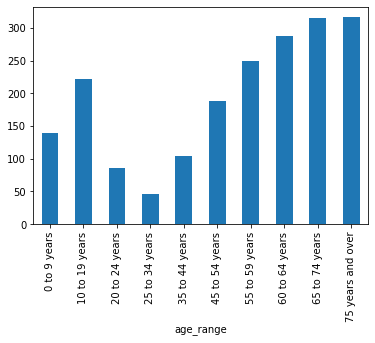

In [294]:
df_comp.groupby('age_range').yearly_checkouts.mean().plot(kind ='bar');

In [295]:
# For the above, there is a definite dip in library usage in starting from early 20s to mid 40s. 
# Then a steady climb from there. But still, the oldest members have the highest average checkouts per years active. 
# What about renewals? Because renewals are directly related to checkouts, this look relatively the same as the graph above. 
df_comp['yearly_renewals'] = np.round(df_comp.total_renewals/(df_comp.circulation_active_year.max()+ 1  - df_comp.circulation_active_year),0)

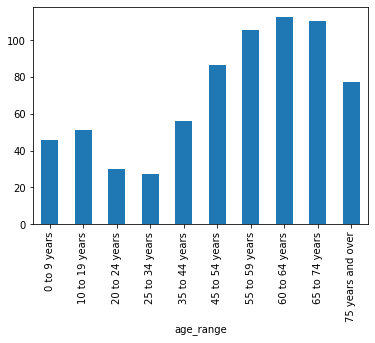

In [296]:
df_comp.groupby('age_range').yearly_renewals.mean().plot(kind ='bar');

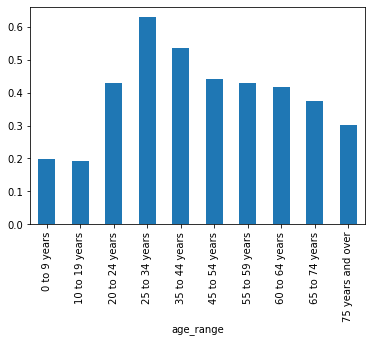

In [297]:
# Interesting, when looking at renewals the highest group is not 60-64 years and the 75 and older is brought 
# down to fifth highest.
# Let's take a look at renewals per checkouts. Because the data does not provide specifics about any particular
# checkout, this again will have to be computed as an average=
# total_renewals/ total_checkouts and I will make this more informative by mutliplying by days allowed per renewal =
# 21 days per renewal. 
df_comp['renewal_rate'] = np.round(df_comp.total_renewals/df_comp.total_checkouts,1)
df_comp.groupby('age_range').renewal_rate.mean().plot(kind ='bar');

In [298]:
df_comp.groupby('age_range').renewal_rate.describe()

,count,mean,std,min,25%,50%,75%,max
age_range,,,,,,,,
0 to 9 years,33469.0,0.199537,0.403408,0.0,0.0,0.0,0.2,6.5
10 to 19 years,51226.0,0.193396,0.350184,0.0,0.0,0.1,0.2,6.0
20 to 24 years,23401.0,0.430721,0.701912,0.0,0.0,0.1,0.6,8.5
25 to 34 years,70721.0,0.629714,0.821156,0.0,0.0,0.3,1.0,7.0
35 to 44 years,55251.0,0.534313,0.692685,0.0,0.0,0.3,0.8,6.7
45 to 54 years,43750.0,0.441783,0.595444,0.0,0.0,0.2,0.6,9.0
55 to 59 years,17432.0,0.429761,0.579710,0.0,0.0,0.2,0.6,6.0
60 to 64 years,16236.0,0.416605,0.555163,0.0,0.0,0.2,0.6,6.0
65 to 74 years,24694.0,0.374868,0.525155,0.0,0.0,0.2,0.5,7.0


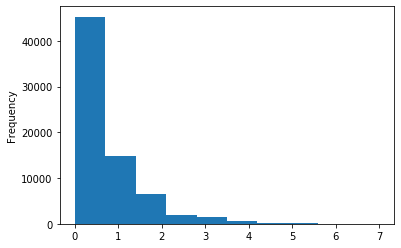

In [299]:
#plot some histograms to get more of a feel for the spread
df_comp[df_comp.age_range == "25 to 34 years"].renewal_rate.plot(kind = "hist");

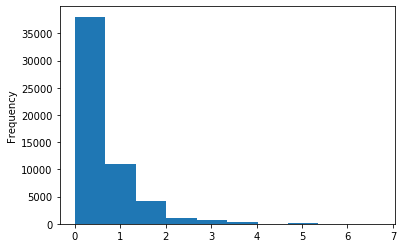

In [300]:
df_comp[df_comp.age_range == "35 to 44 years"].renewal_rate.plot(kind = "hist");

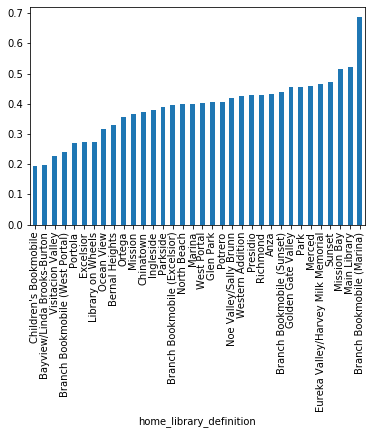

In [301]:
# ok so now I know that if the book has been checked out by a 20 something, I might have to wait an average of 2 - 9 days 
# more than if any other age group has the group
# how does home_library affect this?
df_comp.groupby('home_library_definition').renewal_rate.mean().sort_values().plot(kind = 'bar');

In [302]:
df_comp[df_comp.home_library_definition == "Mission Bay"].groupby('age_range').renewal_rate.mean()

age_range
0 to 9 years         0.293204
10 to 19 years       0.223077
20 to 24 years       0.505366
25 to 34 years       0.677851
35 to 44 years       0.590018
45 to 54 years       0.468315
55 to 59 years       0.346041
60 to 64 years       0.345583
65 to 74 years       0.328398
75 years and over    0.248750
Name: renewal_rate, dtype: float64

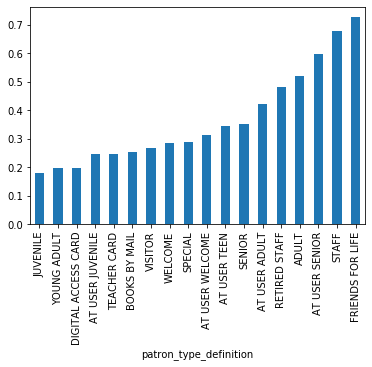

In [304]:
#lets take a look at patron type
df_comp.groupby("patron_type_definition").renewal_rate.mean().sort_values().plot(kind = 'bar');


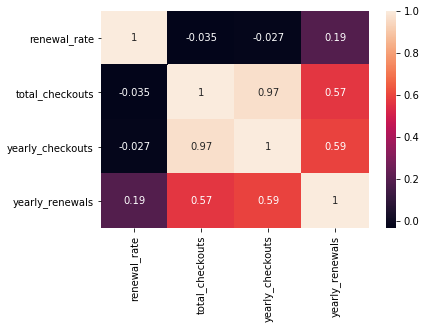

In [305]:
sns.heatmap(df_comp[['renewal_rate', 'total_checkouts', 'age_range', 'yearly_checkouts', 'yearly_renewals']].corr(), annot = True);

## Model

In [306]:
pd.get_dummies(df_comp[['renewal_rate','age_range']].iloc[1:6,], columns = ['age_range'], dummy_na = False, drop_first= True)

,renewal_rate,age_range_10 to 19 years,age_range_20 to 24 years,age_range_25 to 34 years,age_range_35 to 44 years,age_range_45 to 54 years,age_range_55 to 59 years,age_range_60 to 64 years,age_range_65 to 74 years,age_range_75 years and over
1,0.5,0,0,0,0,0,1,0,0,0
2,2.0,0,0,0,0,0,0,1,0,0
3,0.5,0,0,0,0,1,0,0,0,0
4,0.5,0,0,0,0,1,0,0,0,0
5,0.0,0,0,0,0,0,0,0,1,0


In [307]:
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    
    df = pd.get_dummies(df, columns = cat_cols, dummy_na = dummy_na, drop_first= True)

    return df

In [308]:
def clean_fit_linear_mod(df,response_col, dummy_na, test_size=.3, rand_state=42):
    '''
    INPUT:
    df - a dataframe holding all the variables of interest
    response_col - a string holding the name of the column 
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    test_size - a float between [0,1] about what proportion of data should be in the test dataset
    rand_state - an int that is provided as the random state for splitting the data into training and test 
    
    OUTPUT:
    test_score - float - r2 score on the test data
    train_score - float - r2 score on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    
    Your function should:
    1. Drop the rows with missing response values
    2. Drop columns with NaN for all the values
    3. Use create_dummy_df to dummy categorical columns
    4. Fill the mean of the column for any missing values 
    5. Split your data into an X matrix and a response vector y
    6. Create training and test sets of data
    7. Instantiate a LinearRegression model with normalized data
    8. Fit your model to the training data
    9. Predict the response for the training data and the test data
    10. Obtain an rsquared value for both the training and test data
    '''
   # df_drop = df.dropna(subset = [response_col], axis = 0)
   # df_drop_na = df_drop.loc[:,((df_drop.isna().sum()/df_drop.shape[0]) == 1)== False]
    cat_df = df.select_dtypes(include = ['object', 'category'])
    cat_cols = cat_df.columns

    df_dummy = create_dummy_df(df, cat_cols, dummy_na = dummy_na)

    #fill_mean = lambda col: col.fillna(col.mean())

    #df_dummy_fill = df_dummy.apply(fill_mean, axis = 0)

    X = df_dummy.drop(response_col, axis = 1)
    y = df_dummy[response_col]

    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = test_size, random_state = rand_state)

    lm_model = LinearRegression(normalize = True)
    lm_model.fit(X_train,y_train)
    y_preds = lm_model.predict(X_test)
    test_score = r2_score(y_test, y_preds)
    y_preds_train = lm_model.predict(X_train)
    train_score = r2_score(y_train, y_preds_train)

    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test


In [311]:
df_model1 = (df_comp[['patron_type_definition','home_library_definition','age_range','yearly_checkouts','renewal_rate']])

In [312]:
test_score_1, train_score_1, lm_model_1, X_train_1, X_test_1, y_train_1, y_test_1 = clean_fit_linear_mod(df_model1,'renewal_rate', dummy_na=False, test_size=.3, rand_state=42);

In [313]:
test_score_1,train_score_1

(0.07320591052240522, 0.07227671417630865)

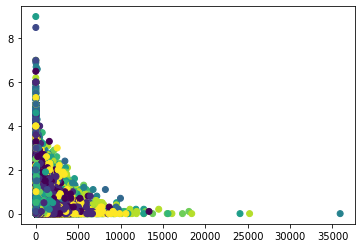

In [322]:
#PLOTS
plt.scatter(x = df_comp.total_checkouts, y = df_comp.renewal_rate.multiply(2*0.5).round(1)
            , c= df_comp.age_range.cat.codes)


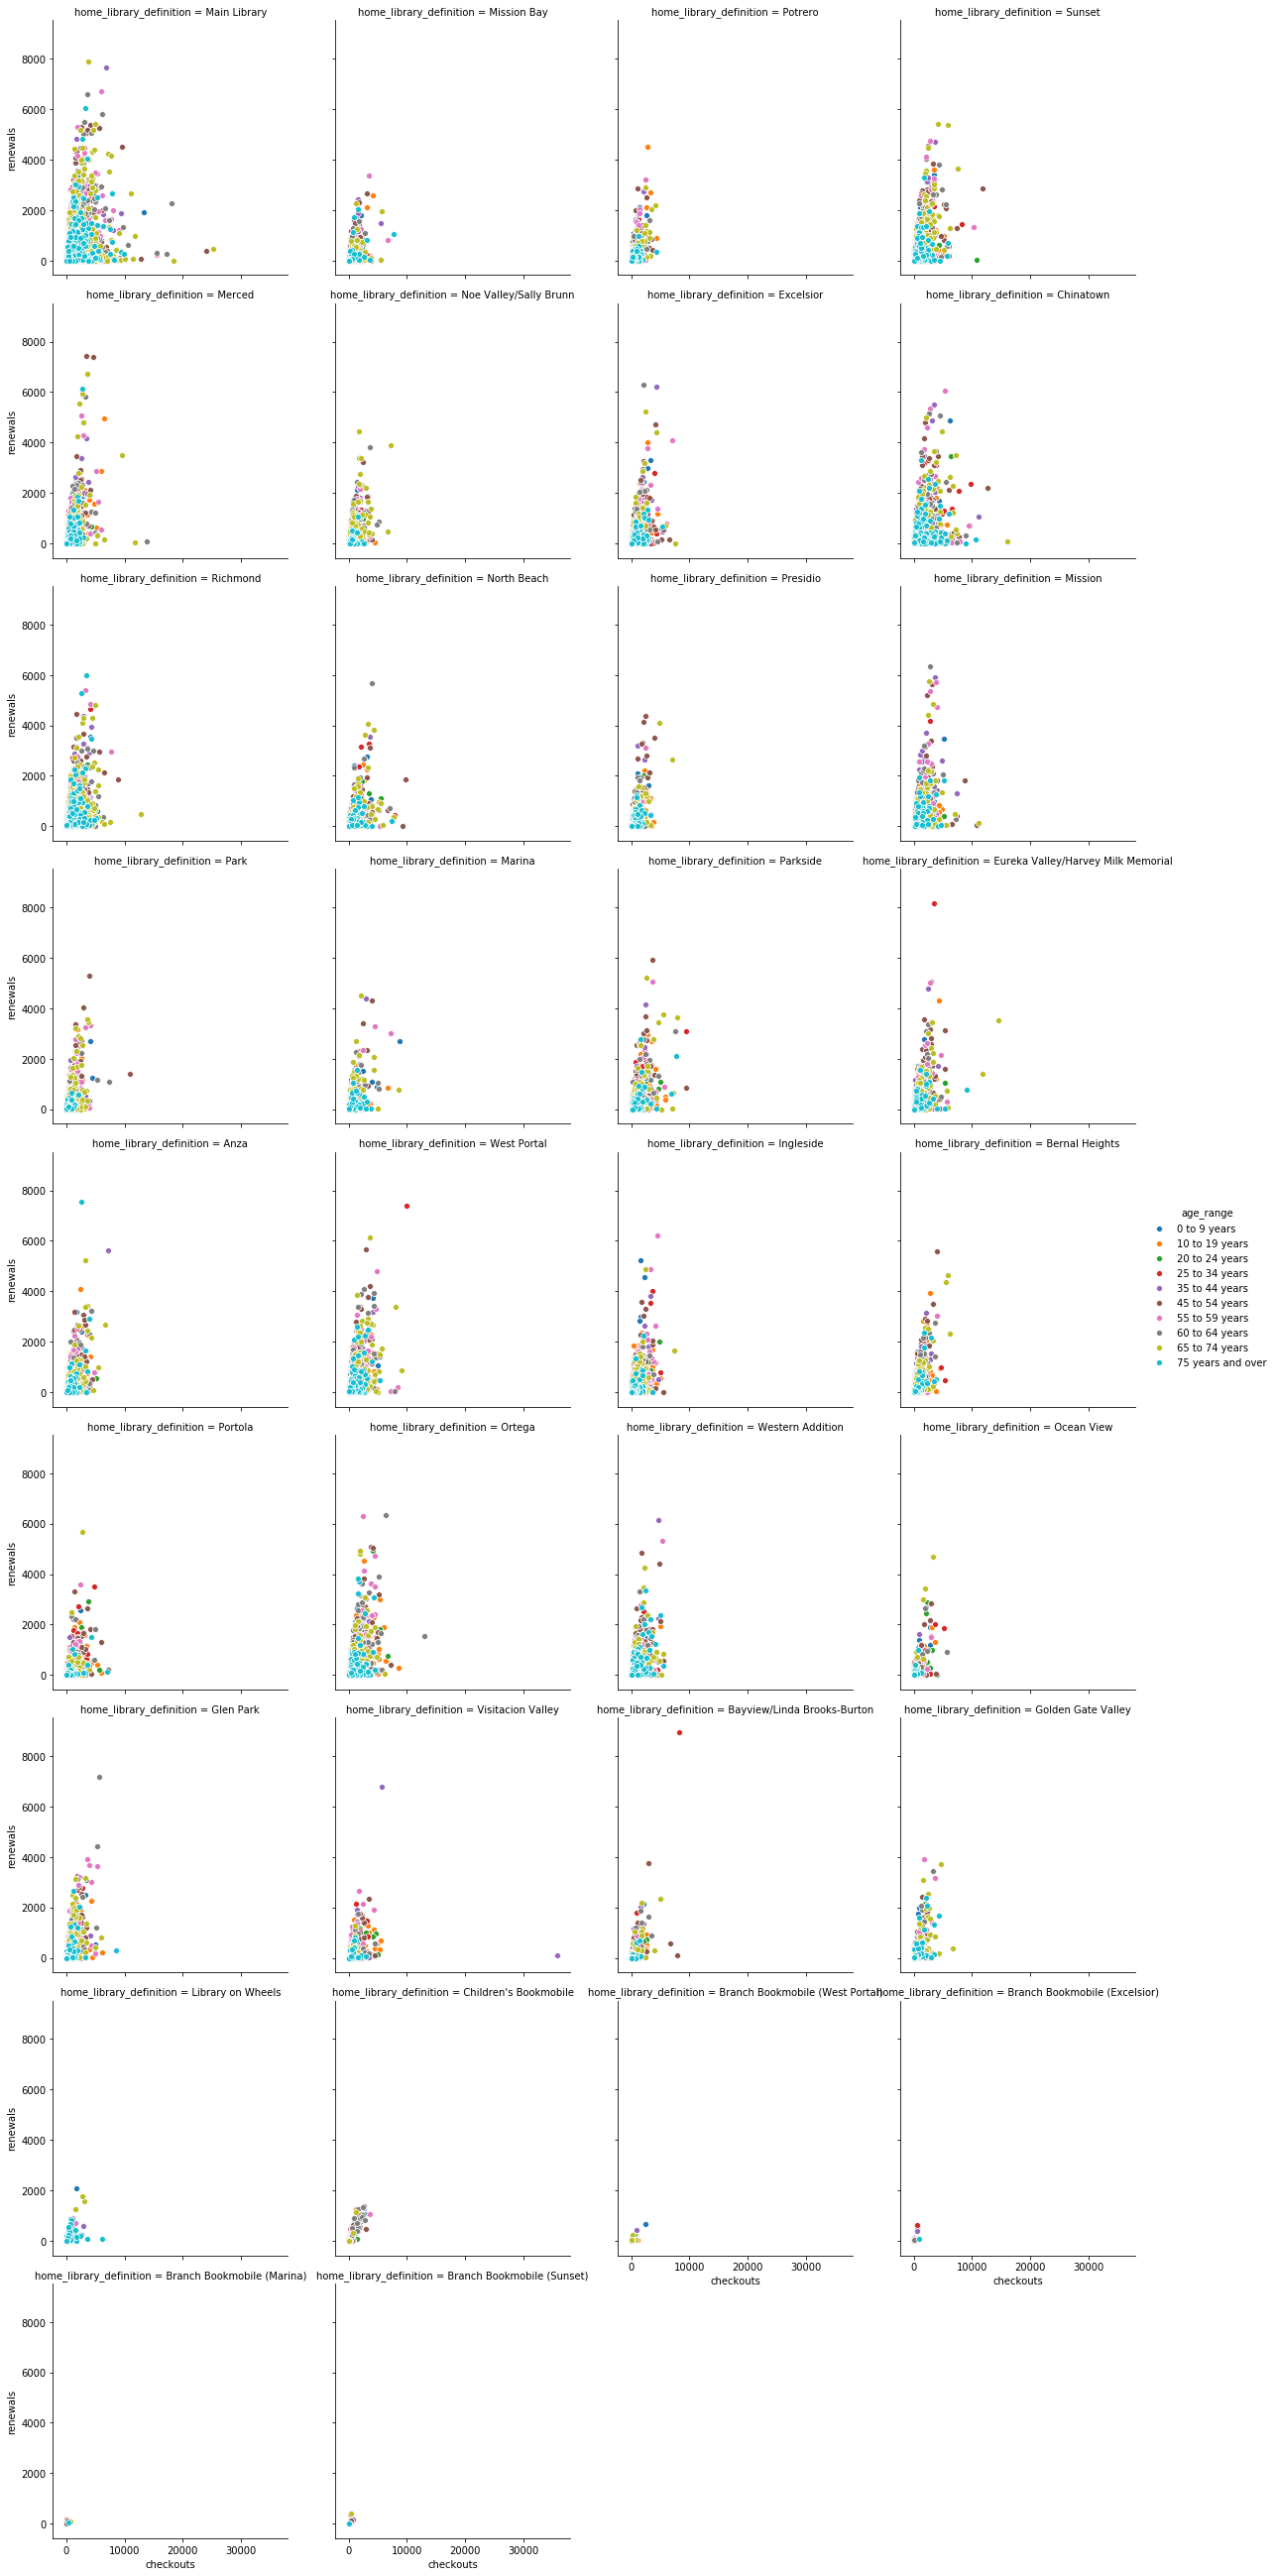

In [330]:
plt1 = sns.FacetGrid(df_comp, col="home_library_definition", hue="age_range", height = 4, col_wrap=4)
plt1.map_dataframe(sns.scatterplot, x="total_checkouts", y="total_renewals")
plt1.set_axis_labels("checkouts", "renewals")
plt1.add_legend()